In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('horse.csv')
imputer = Imputer()

In [3]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

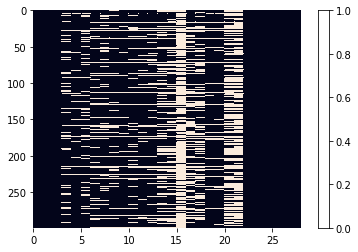

In [4]:
sns.heatmap(df.isnull())

In [ ]:
sns.distplot(df['rectal_temp'].dropna())
#close to normal distribution

In [ ]:
sns.distplot(df['rectal_temp'].dropna())

In [ ]:
sns.distplot(df['packed_cell_volume'].dropna())

In [ ]:
sns.distplot(df['total_protein'].dropna())

In [ ]:
sns.jointplot(x='pulse',y='respiratory_rate',data = df,kind ='reg')

In [ ]:
df.drop('hospital_number',axis = 1,inplace = True)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
sns.countplot('outcome',data = df)

In [ ]:
sns.countplot('outcome',hue = 'age',data = df)

In [ ]:
df.columns

In [ ]:
sns.countplot('outcome',hue = 'surgery',data = df)

In [ ]:
df.info()

In [ ]:
#changing categorical to numeric 
surgery = pd.get_dummies(df['surgery'],drop_first=True)

In [ ]:
age = pd.get_dummies(df['age'],drop_first=True)

In [ ]:
surgical_lesion = pd.get_dummies(df['surgical_lesion'],drop_first=True)

In [ ]:
cp_data = pd.get_dummies(df['cp_data'],drop_first=True)

In [ ]:
df.drop(['surgery','age','surgical_lesion','cp_data'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,surgery,age,surgical_lesion,cp_data],axis=1)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.columns=['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube','nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance','abdomo_protein', 'outcome', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery','young', 'surgical_lesion', 'cp_data']

In [ ]:
df.head()

In [ ]:
df['rectal_temp'].mean()

In [ ]:
df['rectal_temp'] = imputer.fit_transform(df[['rectal_temp']])

In [ ]:
sns.heatmap(df.isnull())
#The heat map shows that there are no missing values in 'rectal_temp'

In [ ]:
df['respiratory_rate'].mean()

In [ ]:
df['respiratory_rate'] = imputer.fit_transform(df[['respiratory_rate']])


In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['pulse'].mean()


In [ ]:
df['pulse'] = imputer.fit_transform(df[['pulse']])


In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head(10)

In [ ]:
sns.countplot(df['nasogastric_reflux_ph'].isnull())

In [ ]:
df.drop('nasogastric_reflux_ph',inplace=True,axis = 1)
#deleted 'nasogastric_reflux_ph' due to a lot of nan values

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
sns.countplot(df['abdomo_protein'].isnull())

In [ ]:
df.drop('abdomo_protein',inplace=True,axis = 1)
#deleted abdomo_protein cause of lack of values

In [ ]:
df.head()

In [ ]:
sns.countplot(df['abdomo_appearance'].isnull())

In [ ]:
df.drop('abdomo_appearance',inplace=True,axis = 1)

In [ ]:
df.head(10)

In [ ]:
sns.countplot(df['total_protein'].isnull())

In [ ]:
#impute values for total_protein
sns.distplot(df['total_protein'].dropna())
#not normally distributed

In [ ]:
df['total_protein'].mean()

In [ ]:
df['total_protein'] = imputer.fit_transform(df[['total_protein']])

In [ ]:
sns.countplot(df['total_protein'].isnull())

In [ ]:
df['packed_cell_volume'].mean()

In [ ]:
df['packed_cell_volume'] = imputer.fit_transform(df[['packed_cell_volume']])

In [ ]:
sns.countplot(df['packed_cell_volume'].isnull())

In [ ]:
sns.countplot(df['abdomen'].isnull())

In [ ]:
def impute_abd(cols):
    abd = cols[0]
   
    
    if pd.isnull(abd):
        return "<UNK>"

    else:
        return abd

In [ ]:
df['abdomen'] = df[['abdomen']].apply(impute_abd,axis=1)

In [ ]:
sns.countplot(df['abdomen'].isnull())

In [ ]:
sns.countplot(df['temp_of_extremities'].isnull())


In [ ]:
df['temp_of_extremities'].unique()
# 5 different values for temp_of_extremities - cold,cool,normal,warm,nan

In [ ]:
def impute_toe(cols):
    temp_of_extremities = cols[0]
   
    
    if pd.isnull(temp_of_extremities):
        return "<UNK>"

    else:
        return temp_of_extremities

In [ ]:
df['temp_of_extremities'] = df[['temp_of_extremities']].apply(impute_toe,axis=1)

In [ ]:
sns.countplot(df['temp_of_extremities'].isnull())

In [ ]:
sns.countplot(df['peripheral_pulse'].isnull())


In [ ]:
df['peripheral_pulse'].unique()

In [ ]:
def impute_pp(cols):
    peripheral_pulse = cols[0]
   
    
    if pd.isnull(peripheral_pulse):
        return "<UNK>"

    else:
        return peripheral_pulse

In [ ]:
df['peripheral_pulse'] = df[['peripheral_pulse']].apply(impute_pp,axis=1)

In [ ]:
sns.countplot(df['peripheral_pulse'].isnull())



In [ ]:
df['mucous_membrane'].unique()

In [ ]:
sns.countplot(df['mucous_membrane'].isnull())

In [ ]:
def impute_mm(cols):
    mucous_membrane = cols[0]
   
    
    if pd.isnull(mucous_membrane):
        return "<UNK>"

    else:
        return mucous_membrane

In [ ]:
df['mucous_membrane'] = df[['mucous_membrane']].apply(impute_mm,axis=1)

In [ ]:
sns.countplot(df['mucous_membrane'].isnull())

In [ ]:
sns.countplot(df['capillary_refill_time'].isnull())

In [ ]:
df['capillary_refill_time'].unique()

In [ ]:
def impute_crt(cols):
    crt = cols[0]
   
    
    if pd.isnull(crt):
        return "<UNK>"

    else:
        return crt

In [ ]:
df['capillary_refill_time'] = df[['capillary_refill_time']].apply(impute_crt,axis=1)

In [ ]:
sns.countplot(df['capillary_refill_time'].isnull())

In [ ]:
sns.countplot(df['pain'].isnull())

In [ ]:
df['pain'].unique()

In [ ]:
def impute_pain(cols):
    pain = cols[0]
   
    
    if pd.isnull(pain):
        return "<UNK>"

    else:
        return pain

In [ ]:
df['pain'] = df[['pain']].apply(impute_pain,axis=1)

In [ ]:
sns.countplot(df['pain'].isnull())

In [ ]:
sns.countplot(df['peristalsis'].isnull())

In [ ]:
df['peristalsis'].unique()

In [ ]:
def impute_peristalsis(cols):
    peristalsis = cols[0]
   
    
    if pd.isnull(peristalsis):
        return "<UNK>"

    else:
        return peristalsis

In [ ]:
df['peristalsis'] = df[['peristalsis']].apply(impute_peristalsis,axis=1)

In [ ]:
sns.countplot(df['peristalsis'].isnull())

In [ ]:
sns.countplot(df['abdominal_distention'].isnull())

In [ ]:
df['abdominal_distention'].unique()

In [10]:
def impute_abddist(cols):
    abddist = cols[0]
   
    
    if pd.isnull(abddist):
        return "<UNK>"

    else:
        return abddist

In [11]:
df['abdominal_distention'] = df[['abdominal_distention']].apply(impute_abddist,axis=1)

In [ ]:
sns.countplot(df['abdominal_distention'].isnull())


In [ ]:
sns.countplot(df['nasogastric_reflux'].isnull())

In [ ]:
df['nasogastric_reflux'].unique()

In [ ]:
def impute_nsref(cols):
    nsref = cols[0]
   
    
    if pd.isnull(nsref):
        return "<UNK>"

    else:
        return nsref

In [ ]:
df['nasogastric_reflux'] = df[['nasogastric_reflux']].apply(impute_nsref,axis=1)

In [ ]:
sns.countplot(df['nasogastric_reflux'].isnull())

In [ ]:
sns.countplot(df['nasogastric_tube'].isnull())

In [ ]:
df['nasogastric_tube'].unique()

In [ ]:
def impute_nstub(cols):
    nstub = cols[0]
   
    
    if pd.isnull(nstub):
        return "<UNK>"

    else:
        return nstub

In [ ]:
df['nasogastric_tube'] = df[['nasogastric_tube']].apply(impute_nstub,axis=1)

In [ ]:
sns.countplot(df['nasogastric_tube'].isnull())

In [ ]:
sns.countplot(df['rectal_exam_feces'].isnull())

In [ ]:
df['rectal_exam_feces'].unique()

In [ ]:
def impute_recex(cols):
    recex = cols[0]
   
    
    if pd.isnull(recex):
        return "<UNK>"

    else:
        return recex

In [ ]:
df['rectal_exam_feces'] = df[['rectal_exam_feces']].apply(impute_recex,axis=1)

In [ ]:
sns.countplot(df['rectal_exam_feces'].isnull())

In [ ]:
sns.countplot(df['lesion_1'].isnull())

In [ ]:
sns.countplot(df['lesion_2'].isnull())

In [ ]:
sns.countplot(df['lesion_3'].isnull())

In [ ]:
df.columns

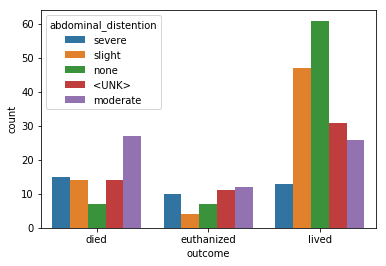

In [12]:
sns.countplot(x='outcome',hue = 'abdominal_distention',data = df)
#shows that majority of the hourses that lived had no abdomial distention

In [13]:
df.groupby(['outcome','abdominal_distention'])['hospital_number'].count()

outcome     abdominal_distention
died        <UNK>                   14
            moderate                27
            none                     7
            severe                  15
            slight                  14
euthanized  <UNK>                   11
            moderate                12
            none                     7
            severe                  10
            slight                   4
lived       <UNK>                   31
            moderate                26
            none                    61
            severe                  13
            slight                  47
Name: hospital_number, dtype: int64

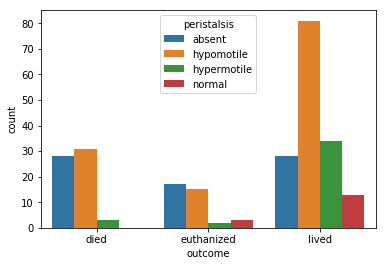

In [14]:
sns.countplot(x='outcome',hue = 'peristalsis',data = df)
#shows that majority of the hourses that lived had hypomotile peristalsis

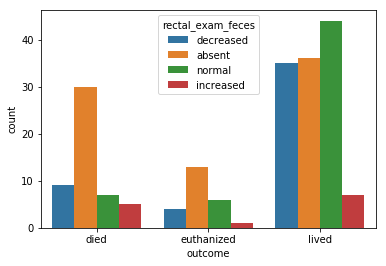

In [23]:
sns.countplot(x='outcome',hue = 'rectal_exam_feces',data = df)


In [ ]:
sns.heatmap(df.isnull())
#shows that there are no nan values

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
sns.boxplot(x='young',y='pulse',data = df)
#younger horses have a higher pulse. 

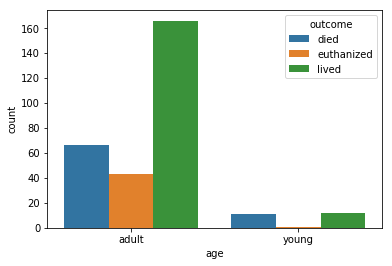

In [21]:
sns.countplot(x='age',hue='outcome',data = df)

In [ ]:
sns.countplot(x='lesion_1',data = df)

In [ ]:
df['lesion_1'].unique()

In [ ]:
sns.countplot(x='lesion_2',data = df)

In [ ]:
sns.countplot(x='lesion_3',data = df)

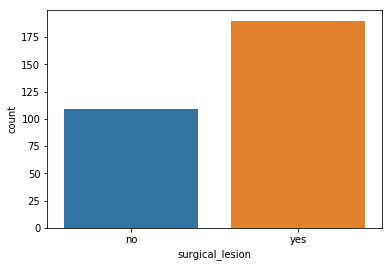

In [22]:
sns.countplot(x='surgical_lesion',data = df)

In [ ]:
## so far, an extensive eda has been performed , and missing values have been imputed for numerical data.
##now, coming to categorical a token <UNK> has been assigned. 

In [ ]:
df.head(20)

In [ ]:
df_copy = df.copy()
df_copy_2 = df.copy()


In [ ]:
df_copy_2.head()#will use to concat

In [ ]:
df_copy_2.drop(['temp_of_extremities','peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen','outcome'],axis=1,inplace=True)

In [ ]:
df_copy_2.head() #only numeric values

In [ ]:
#using df_copy
cat_df_copy = df_copy.select_dtypes(include=['object'])

In [ ]:
cat_df_copy.head()

In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['temp_of_extremities'], prefix = ['toe'])

cat_df_copy.head()

In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['peripheral_pulse'], prefix = ['pp'])

cat_df_copy.head()

In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['mucous_membrane'], prefix = ['mm'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['capillary_refill_time'], prefix = ['crt'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['pain'], prefix = ['pain'])

cat_df_copy.head()

In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['peristalsis'], prefix = ['peristalsis'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['abdominal_distention'], prefix = ['ad'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['nasogastric_tube'], prefix = ['nt'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['nasogastric_reflux'], prefix = ['nf'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['rectal_exam_feces'], prefix = ['ref'])



In [ ]:

cat_df_copy = pd.get_dummies(cat_df_copy, columns=['abdomen'], prefix = ['abd'])



In [ ]:
le = LabelEncoder()
le.fit(["died","euthanized","lived"])
cat_df_copy['outcome'] = le.transform(cat_df_copy['outcome'])

In [ ]:
cat_df_copy.head(4)

In [ ]:
df_copy_2.head() ## all values are in the form of numbers and vectors.

In [ ]:
cat_df_copy.info()

In [ ]:
df_copy_2.info()

In [ ]:
df_copy_2.drop('cp_data',axis=1,inplace=True)

In [ ]:
X = pd.DataFrame(data=pd.concat([cat_df_copy,df_copy_2],axis=1))
X.head()

In [ ]:
x = X.drop('outcome',axis=1).values
y = X['outcome'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [ ]:
algo = {'LR':LogisticRegression(),
        'DT':DecisionTreeClassifier(),
        'RFC':RandomForestClassifier(n_estimators=100),
        'SVM':SVC(gamma=0.001,kernel='rbf'),
        'KNN':KNeighborsClassifier(n_neighbors=10)}

In [ ]:
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Confusion Matrix : \n'+format(confusion_matrix(y_test, model.predict(X_test),labels = [0,1,2])))
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))
    print(classification_report(y_test, model.predict(X_test)))
    print('\n')